In [1]:
# Team - Wisdom
# Team Members - (1) Aarya Nitin Shirke (2) Kaushik Jha
# GitHub Repository Link - https://github.com/KaushikJha-2003/TrainIT   
"""
# COVID-19 Data Analysis and Prediction
## Introduction
This project aims to analyze COVID-19 data using machine learning techniques to predict confirmed cases based on testing
and vaccination data. 

## Dataset Overview
We use three datasets:
1. COVID-19 Cases Data - Contains daily confirmed, recovered, and death cases across states.
2. Statewise Testing Data- Provides details on total tests conducted, negative and positive results.
3. Vaccination Data - Tracks the number of vaccine doses administered.

## Conclusion
This analysis helps in understanding how testing and vaccination impact the spread of COVID-19. The model can be used to forecast case trends, aiding in decision-making for health policies.

# Let's dive into the code below! 🚀
"""

"\n# COVID-19 Data Analysis and Prediction\n## Introduction\nThis project aims to analyze COVID-19 data using machine learning techniques to predict confirmed cases based on testing\nand vaccination data. \n\n## Dataset Overview\nWe use three datasets:\n1. COVID-19 Cases Data - Contains daily confirmed, recovered, and death cases across states.\n2. Statewise Testing Data- Provides details on total tests conducted, negative and positive results.\n3. Vaccination Data - Tracks the number of vaccine doses administered.\n\n## Conclusion\nThis analysis helps in understanding how testing and vaccination impact the spread of COVID-19. The model can be used to forecast case trends, aiding in decision-making for health policies.\n\n# Let's dive into the code below! 🚀\n"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **Load datasets**

In [3]:
df_vaccine = pd.read_csv("/kaggle/input/covid19-data/covid_vaccine_statewise.csv")
df_cases = pd.read_csv("/kaggle/input/covid19-data/covid_19_india.csv")
df_testing = pd.read_csv("/kaggle/input/covid19-data/StatewiseTestingDetails.csv")

# **Convert date columns to datetime format**

In [4]:
print("Columns in df_cases:", df_cases.columns)
print("Columns in df_testing:", df_testing.columns)
print("Columns in df_vaccine:", df_vaccine.columns)

Columns in df_cases: Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')
Columns in df_testing: Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')
Columns in df_vaccine: Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(I

In [5]:
df_vaccine.rename(columns={"Updated On": "Date"}, inplace=True)

In [6]:
# Converting Date columns to datetime format
df_cases['Date'] = pd.to_datetime(df_cases['Date'], errors='coerce')
df_testing['Date'] = pd.to_datetime(df_testing['Date'], errors='coerce')
df_vaccine['Date'] = pd.to_datetime(df_vaccine['Date'], errors='coerce')

<ipython-input-6-a942c1465431>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_vaccine['Date'] = pd.to_datetime(df_vaccine['Date'], errors='coerce')


# **Handling irrelevant columns from cases dataset**

In [7]:
df_cases.rename(columns={"State/UnionTerritory": "State"}, inplace=True)

In [8]:
# Convert 'Negative' column in testing dataset to numeric
df_testing['Negative'] = pd.to_numeric(df_testing['Negative'], errors='coerce')

In [9]:
# Fill missing values
df_vaccine.fillna(0, inplace=True)
df_testing.fillna(0, inplace=True)

# **Merging Datasets**

In [10]:
print("Columns in df_cases:", df_cases.columns)
print("Columns in df_testing:", df_testing.columns)
print("Columns in df_vaccine:", df_vaccine.columns)


Columns in df_cases: Index(['Sno', 'Date', 'Time', 'State', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')
Columns in df_testing: Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')
Columns in df_vaccine: Index(['Date', 'State', 'Total Doses Administered', 'Sessions', ' Sites ',
       'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Tr

In [11]:
df_cases.rename(columns={"State/UnionTerritory": "State"}, inplace=True)

In [12]:
df_merged = df_cases.merge(df_testing, on=["Date", "State"], how="left").merge(df_vaccine, on=["Date", "State"], how="left")
df_merged.fillna(0, inplace=True)

# **Plotting Covid-19 cases over the time**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

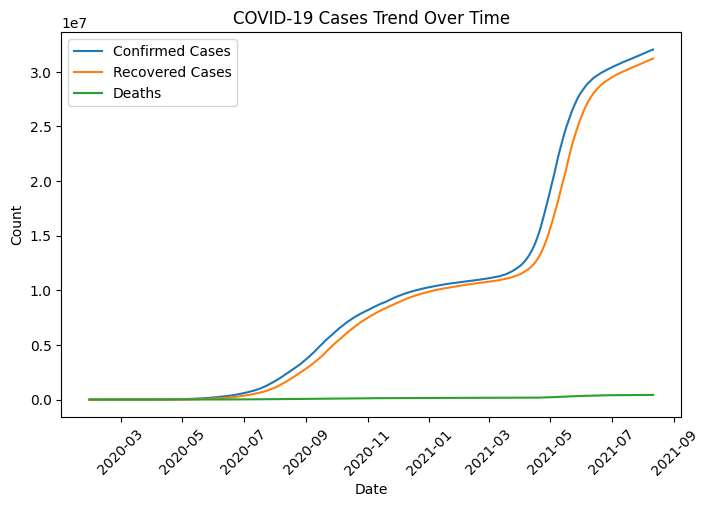

In [13]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_cases.groupby("Date").sum(), x=df_cases["Date"].unique(), y="Confirmed", label="Confirmed Cases")
sns.lineplot(data=df_cases.groupby("Date").sum(), x=df_cases["Date"].unique(), y="Cured", label="Recovered Cases")
sns.lineplot(data=df_cases.groupby("Date").sum(), x=df_cases["Date"].unique(), y="Deaths", label="Deaths")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Cases Trend Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# **Computing Correlation Matrix**

In [14]:
correlation_matrix = df_merged.select_dtypes(include=['float64', 'int64']).corr()

In [15]:
correlation_matrix
# A high correlation would mean less redundancy and higher accuracy in predictions

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Sno,Cured,Deaths,Confirmed,TotalSamples,Negative,Positive,Total Doses Administered,Sessions,Sites,...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
Sno,1.000000,0.408491,0.301752,0.403022,0.485158,0.199407,-0.021324,0.473472,0.400924,0.423615,...,0.326547,0.331408,0.324215,0.288535,0.332912,0.331263,NaN,NaN,NaN,0.339881
Cured,0.408491,1.000000,0.917530,0.997751,0.771121,0.117076,0.050717,0.705062,0.555984,0.526238,...,0.459496,0.518012,0.532253,0.415700,0.481073,0.472007,NaN,NaN,NaN,0.485084
Deaths,0.301752,0.917530,1.000000,0.918346,0.636130,0.038723,0.107352,0.573927,0.454083,0.438530,...,0.385046,0.427340,0.436563,0.329602,0.382679,0.368938,NaN,NaN,NaN,0.384489
Confirmed,0.403022,0.997751,0.918346,1.000000,0.766605,0.115885,0.068165,0.695260,0.550271,0.534404,...,0.437483,0.494601,0.509124,0.421780,0.502988,0.495893,NaN,NaN,NaN,0.504264
TotalSamples,0.485158,0.771121,0.636130,0.766605,1.000000,0.135901,0.006851,0.764081,0.658772,0.699123,...,0.546660,0.552355,0.537863,0.453174,0.503869,0.500349,NaN,NaN,NaN,0.518760
Negative,0.199407,0.117076,0.038723,0.115885,0.135901,1.000000,0.128775,0.092980,0.077881,0.098458,...,0.035412,0.090279,0.060921,0.042920,0.082545,0.062504,NaN,NaN,NaN,0.070303
Positive,-0.021324,0.050717,0.107352,0.068165,0.006851,0.128775,1.000000,-0.023862,-0.030302,-0.041828,...,0.001473,-0.009012,-0.010634,-0.025138,-0.035014,-0.035892,NaN,NaN,NaN,-0.035612
Total Doses Administered,0.473472,0.705062,0.573927,0.695260,0.764081,0.092980,-0.023862,1.000000,0.740095,0.574148,...,0.828652,0.836037,0.827649,0.445284,0.482633,0.472451,NaN,NaN,NaN,0.485108
Sessions,0.400924,0.555984,0.454083,0.550271,0.658772,0.077881,-0.030302,0.740095,1.000000,0.702991,...,0.549382,0.560568,0.544998,0.449768,0.457872,0.451233,NaN,NaN,NaN,0.469432
Sites,0.423615,0.526238,0.438530,0.534404,0.699123,0.098458,-0.041828,0.574148,0.702991,1.000000,...,0.276980,0.284403,0.277273,0.465080,0.601132,0.618635,NaN,NaN,NaN,0.614245


# **Plotting the Heatmap**

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


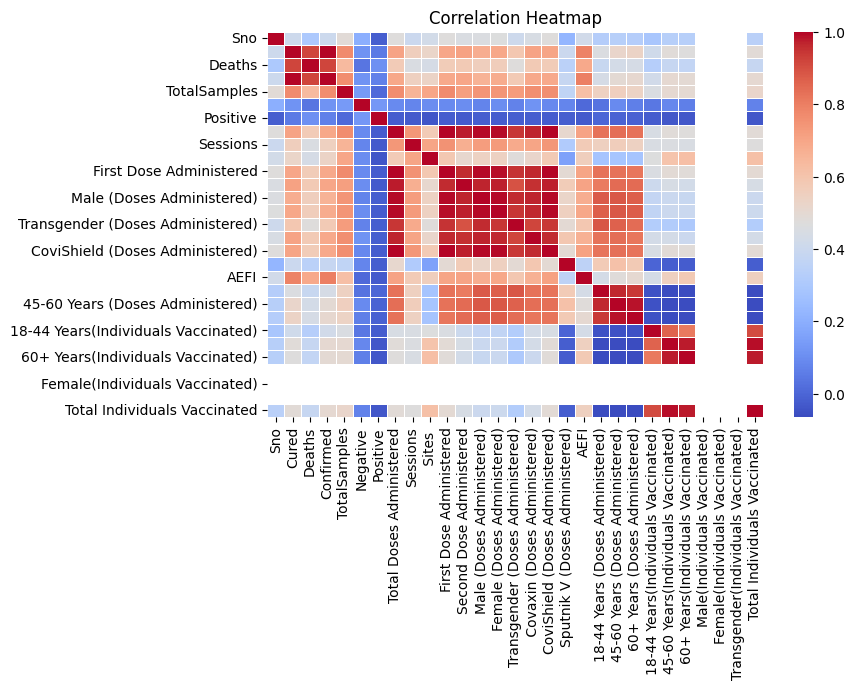

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Splittng the training and testing data**

In [17]:
# Select features and target variable
features = ['TotalSamples', 'Negative', 'Positive', 'Total Doses Administered', 'First Dose Administered', 'Second Dose Administered']
target = 'Confirmed'

df_model = df_merged[df_merged[target] > 0]
X = df_model[features]
y = df_model[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Creating a Pipeline**

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [20]:
# Defining numerical columns
numerical_features = ['TotalSamples', 'Negative', 'Positive', 
                      'Total Doses Administered', 'First Dose Administered', 'Second Dose Administered']

# **Training the model**

In [21]:
# --- Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_test_pred=rf_model.predict(X_test)

In [22]:
# --- Decision Tree Regressor ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [23]:
# --- Logistic Regression (Classification) ---
# Convert target to binary for classification
threshold = y_train.median()
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train_class)
y_pred_lr = lr_model.predict(X_test_scaled)

# **Evaluating model performance on test data**

In [24]:
# Random Forest Regressor
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nRandom Forest Regressor Performance:")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R^2 Score: {test_r2}")


Random Forest Regressor Performance:
Test MAE: 54913.71746159716
Test MSE: 37700252015.53714
Test R^2 Score: 0.9202891768100047


In [25]:
# Decision Tree Regressor
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("\nDecision Tree Regressor Performance:")
print(f"MAE: {dt_mae}")
print(f"MSE: {dt_mse}")
print(f"R^2 Score: {dt_r2}")


Decision Tree Regressor Performance:
MAE: 56177.074802834424
MSE: 55868431277.629486
R^2 Score: 0.881875626570395


In [26]:
# Logistic Regression (Binary Classification)
lr_acc = accuracy_score(y_test_class, y_pred_lr)
lr_precision = precision_score(y_test_class, y_pred_lr)
lr_recall = recall_score(y_test_class, y_pred_lr)
lr_f1 = f1_score(y_test_class, y_pred_lr)
print("\nLogistic Regression (Binary Classification) Performance:")
print(f"Accuracy: {lr_acc}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")


Logistic Regression (Binary Classification) Performance:
Accuracy: 0.9440907832825907
Precision: 0.9846059113300493
Recall: 0.9003378378378378
F1 Score: 0.9405882352941176


# **Adding Random Forest Regressor to the pipeline**

In [27]:
# Create final pipeline with Random Forest Regressor
model_pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [28]:
# Fit the pipeline to the training data
model_pipeline_rf.fit(X_train, y_train)

# Predict using the pipeline
y_pred_rf_pipeline = model_pipeline_rf.predict(X_test)

# Evaluate performance of the pipeline
pipeline_mae_rf = mean_absolute_error(y_test, y_pred_rf_pipeline)
pipeline_mse_rf = mean_squared_error(y_test, y_pred_rf_pipeline)
pipeline_r2_rf = r2_score(y_test, y_pred_rf_pipeline)

# Print model performance after using pipeline
print(f"✅ Pipeline Performance with Random Forest Regressor:")
print(f"MAE: {pipeline_mae_rf:.2f}")
print(f"MSE: {pipeline_mse_rf:.2f}")
print(f"R² Score: {pipeline_r2_rf:.4f}")

✅ Pipeline Performance with Random Forest Regressor:
MAE: 54837.97
MSE: 37601356034.79
R² Score: 0.9205


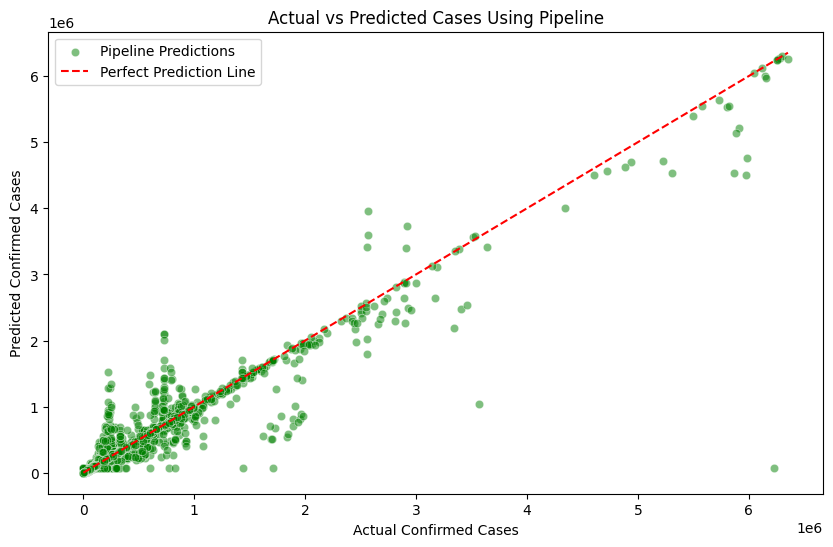

In [29]:
# Visualize actual vs predicted using pipeline model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf_pipeline, alpha=0.5, color="green", label="Pipeline Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Perfect Prediction Line")
plt.xlabel("Actual Confirmed Cases")
plt.ylabel("Predicted Confirmed Cases")
plt.title("Actual vs Predicted Cases Using Pipeline")
plt.legend()
plt.show()

# **Ensemble Learning for Model Boosting**

In [30]:
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [31]:
# Define base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
lr_model = LinearRegression()

# Advanced models
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)

In [32]:
# Define the Bagging Regressor
bagging_model = BaggingRegressor(
    base_estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
# Create Voting Regressor
voting_model = VotingRegressor(estimators=[
    ('rf', rf_model),
    ('dt', dt_model),
    ('lr', lr_model)
])
# Create Stacking Regressor
stacking_model = StackingRegressor(
    estimators=[
        ('rf', rf_model),
        ('dt', dt_model),
        ('lr', lr_model)
    ],
    final_estimator=LinearRegression()
)
# Create AdaBoost Regressor
adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=42)
# Create XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
# Create LightGBM Regressor
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

In [33]:
# List of ensemble models
ensemble_models = {
    'Voting Regressor': voting_model,
    'Stacking Regressor': stacking_model,
    'Bagging Regressor': bagging_model,
    'AdaBoost Regressor': adaboost_model,
    'XGBoost Regressor': xgb_model,
    'LightGBM Regressor': lgbm_model
}

# Dictionary to store model performance
ensemble_results = {}

# Fit and evaluate each model
for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred_ensemble = model.predict(X_test)
    
    mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
    mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
    r2_ensemble = r2_score(y_test, y_pred_ensemble)

    ensemble_results[name] = {
        'MAE': mae_ensemble,
        'MSE': mse_ensemble,
        'R² Score': r2_ensemble
    }

# Display results
ensemble_results_df = pd.DataFrame(ensemble_results).T
print(ensemble_results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 14452, number of used features: 6
[LightGBM] [Info] Start training from score 300283.419319
                              MAE           MSE  R² Score
Voting Regressor     83899.335760  5.606364e+10  0.881463
Stacking Regressor   54977.147709  3.750851e+10  0.920695
Bagging Regressor    59713.437435  3.981725e+10  0.915813
AdaBoost Regressor  168773.657568  1.358516e+11  0.712765
XGBoost Regressor    52895.745856  3.027175e+10  0.935995
LightGBM Regressor   67758.059972  3.489354e+10  0.926224


# **Model Interpretability Using SHAP**

In [34]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

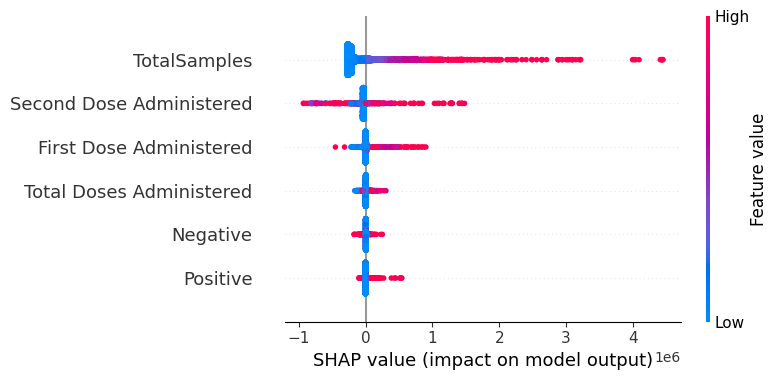

In [35]:
# Import SHAP
import shap

# Create a SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize feature importance with SHAP
shap.summary_plot(shap_values, X_test)

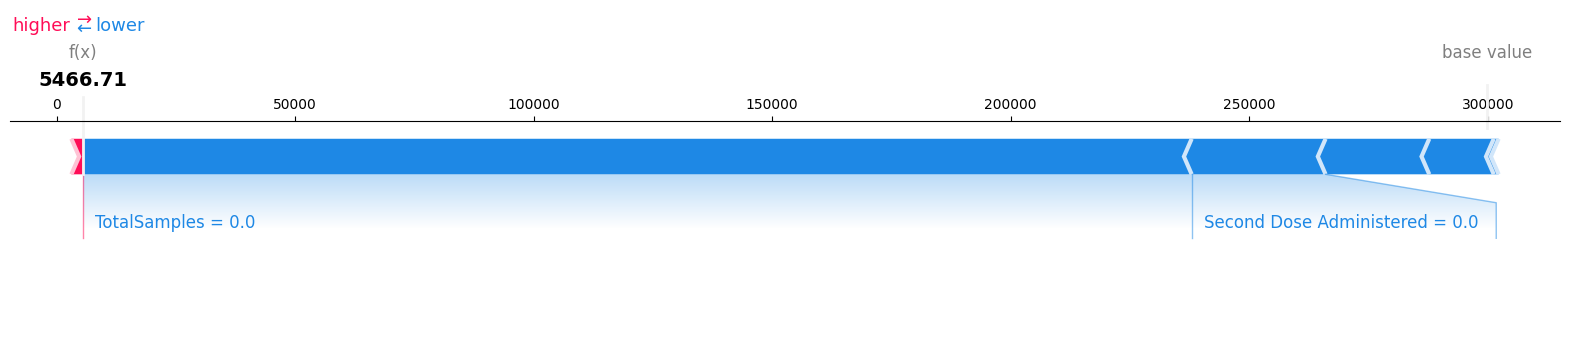

In [36]:
# Visualize explanation for a single prediction
i = 5  # Index of the prediction to explain
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i], matplotlib=True)

# **Scenario Modeling for Policy Decisions**

# Defining Scenarios
1. Baseline Scenario (No Intervention)
No additional interventions, with cases following the existing trend.

2. Lockdown Scenario
Lockdown applied to reduce the rate of infection by 50%.

3. Increased Testing Scenario
Ramp-up in testing to identify and isolate cases faster, reducing infection by 40%.

In [37]:
# Define baseline reproduction rate (R0)
baseline_r0 = 1.5  # Basic reproduction number without intervention

# Define intervention effectiveness
lockdown_effectiveness = 0.5   # 50% reduction in spread
testing_effectiveness = 0.4    # 40% reduction with increased testing

# Define duration of simulation
days_to_simulate = 60

In [38]:
def simulate_cases(initial_cases, r0, days, effectiveness=0):
    """Simulate COVID-19 case growth based on reproduction number and intervention effectiveness."""
    cases = [initial_cases]
    for day in range(1, days + 1):
        new_cases = cases[-1] * (r0 * (1 - effectiveness))
        cases.append(new_cases)
    return cases

In [39]:
# Initial number of cases
initial_cases = 1000

# Simulate baseline (no intervention)
baseline_cases = simulate_cases(initial_cases, baseline_r0, days_to_simulate)

# Simulate lockdown scenario
lockdown_cases = simulate_cases(initial_cases, baseline_r0, days_to_simulate, lockdown_effectiveness)

# Simulate increased testing scenario
testing_cases = simulate_cases(initial_cases, baseline_r0, days_to_simulate, testing_effectiveness)

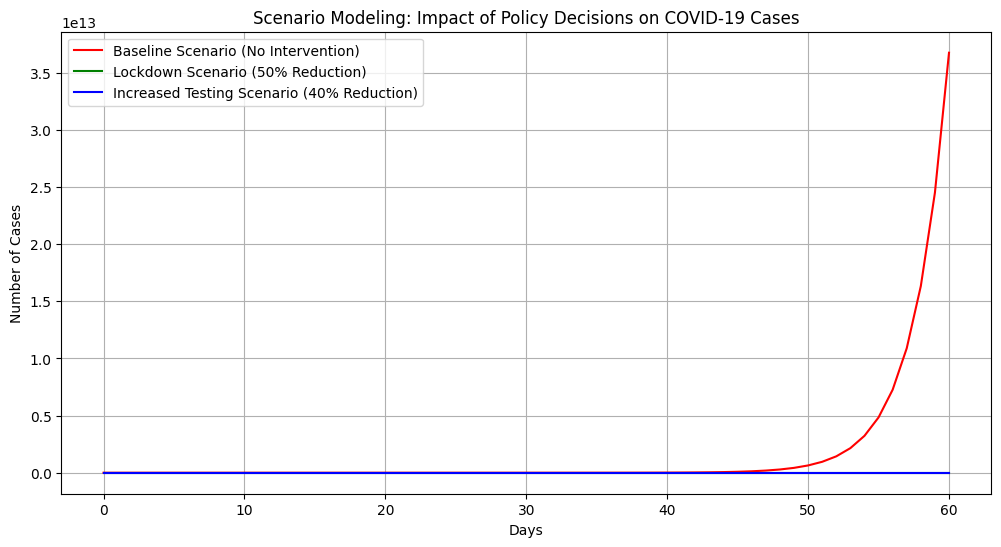

In [40]:
# Plot simulated scenarios
plt.figure(figsize=(12, 6))

plt.plot(baseline_cases, label="Baseline Scenario (No Intervention)", color="red")
plt.plot(lockdown_cases, label="Lockdown Scenario (50% Reduction)", color="green")
plt.plot(testing_cases, label="Increased Testing Scenario (40% Reduction)", color="blue")

plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.title("Scenario Modeling: Impact of Policy Decisions on COVID-19 Cases")
plt.legend()
plt.grid(True)
plt.show()

# **Hyperparameter Tuning with Grid Search/Random Search**

In [41]:
# Define Random Forest and its hyperparameter grid
rf_model = RandomForestRegressor(random_state=42)

rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

# Define Decision Tree and its hyperparameter grid
dt_model = DecisionTreeRegressor(random_state=42)

dt_param_grid = {
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["squared_error", "friedman_mse"],
}

# Define Logistic Regression and its hyperparameter grid
lr_model = LogisticRegression(max_iter=5000, random_state=42)

lr_param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear", "saga"],
    "penalty": ["l2", "none"],
}

In [42]:
# Randomized Search for Random Forest
rf_random_search = RandomizedSearchCV(
    rf_model, rf_param_grid, n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42
)
rf_random_search.fit(X_train, y_train)

# Best RF Model
best_rf_model = rf_random_search.best_estimator_

# Get best parameters
print("Best Parameters for Random Forest:", rf_random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


In [43]:
# Grid Search for Decision Tree
dt_grid_search = GridSearchCV(
    dt_model, dt_param_grid, cv=5, n_jobs=-1, verbose=2
)
dt_grid_search.fit(X_train, y_train)

# Best DT Model
best_dt_model = dt_grid_search.best_estimator_

# Get best parameters
print("Best Parameters for Decision Tree:", dt_grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'squared_error', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [44]:
# Grid Search for Logistic Regression
lr_grid_search = GridSearchCV(
    lr_model, lr_param_grid, cv=5, n_jobs=-1, verbose=2
)
lr_grid_search.fit(X_train, y_train_class)  # Use classification target

# Best LR Model
best_lr_model = lr_grid_search.best_estimator_

# Get best parameters
print("Best Parameters for Logistic Regression:", lr_grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}



25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' is not supported for the liblinear solver")
ValueError: penalty='none' is not supported for the libline

In [45]:
# Predict with best RF model
y_rf_pred = best_rf_model.predict(X_test)

# Evaluation metrics
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print("\nRandom Forest Tuned Performance:")
print(f"MAE: {rf_mae:.4f}, MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")


Random Forest Tuned Performance:
MAE: 54764.9561, MSE: 37101628924.3014, R²: 0.9216


In [46]:
# Predict with best DT model
y_dt_pred = best_dt_model.predict(X_test)

# Evaluation metrics
dt_mae = mean_absolute_error(y_test, y_dt_pred)
dt_mse = mean_squared_error(y_test, y_dt_pred)
dt_r2 = r2_score(y_test, y_dt_pred)

print("\nDecision Tree Tuned Performance:")
print(f"MAE: {dt_mae:.4f}, MSE: {dt_mse:.4f}, R²: {dt_r2:.4f}")


Decision Tree Tuned Performance:
MAE: 58675.5112, MSE: 62525600640.5926, R²: 0.8678


In [47]:
# Predict with best LR model
y_lr_pred = best_lr_model.predict(X_test)

# Classification Accuracy (for logistic regression)
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test_class, y_lr_pred)
print("\nLogistic Regression Tuned Performance:")
print(f"Accuracy: {lr_accuracy:.4f}")


Logistic Regression Tuned Performance:
Accuracy: 0.5574


In [48]:
# Compare model scores
model_results = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression"],
    "MAE": [rf_mae, dt_mae, None],
    "MSE": [rf_mse, dt_mse, None],
    "R² Score": [rf_r2, dt_r2, None],
    "Accuracy": [None, None, lr_accuracy]
})

print("\nModel Comparison Results:")
print(model_results)


Model Comparison Results:
                 Model           MAE           MSE  R² Score  Accuracy
0        Random Forest  54764.956106  3.710163e+10  0.921555       NaN
1        Decision Tree  58675.511168  6.252560e+10  0.867800       NaN
2  Logistic Regression           NaN           NaN       NaN  0.557431


invalid value encountered in greater
invalid value encountered in less
invalid value encountered in greater


# **Visual Insights from Model's Predictions**

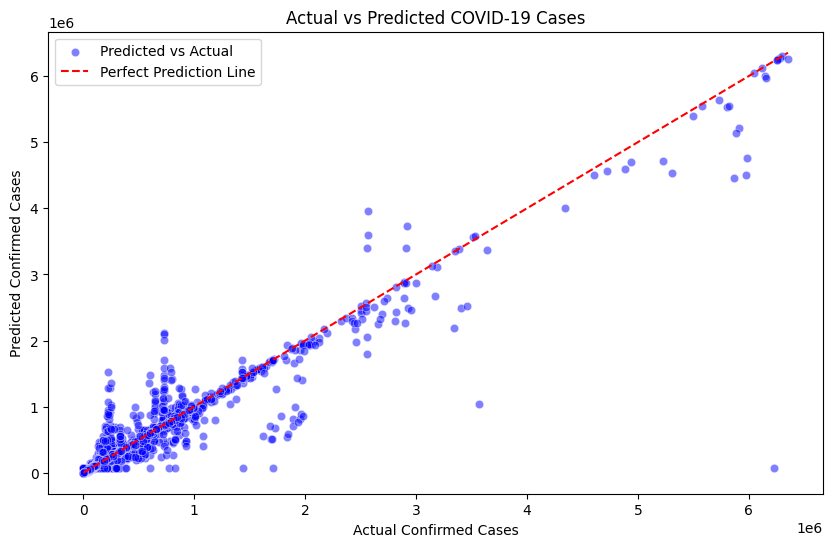

In [49]:
# Actual vs. Predicted Cases (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Perfect Prediction Line")
plt.xlabel("Actual Confirmed Cases")
plt.ylabel("Predicted Confirmed Cases")
plt.title("Actual vs Predicted COVID-19 Cases")
plt.legend()
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


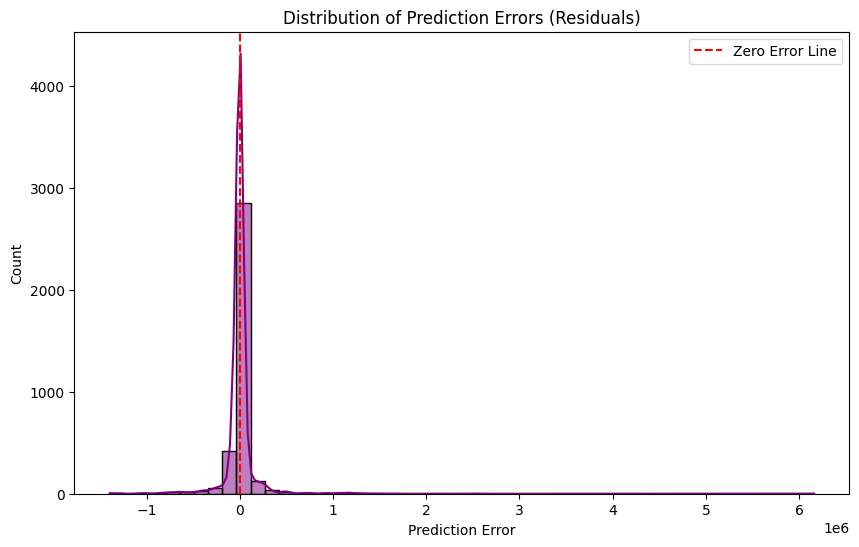

In [50]:
# Residual Plot (Error Distribution)
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color="purple")
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error Line")
plt.legend()
plt.show()

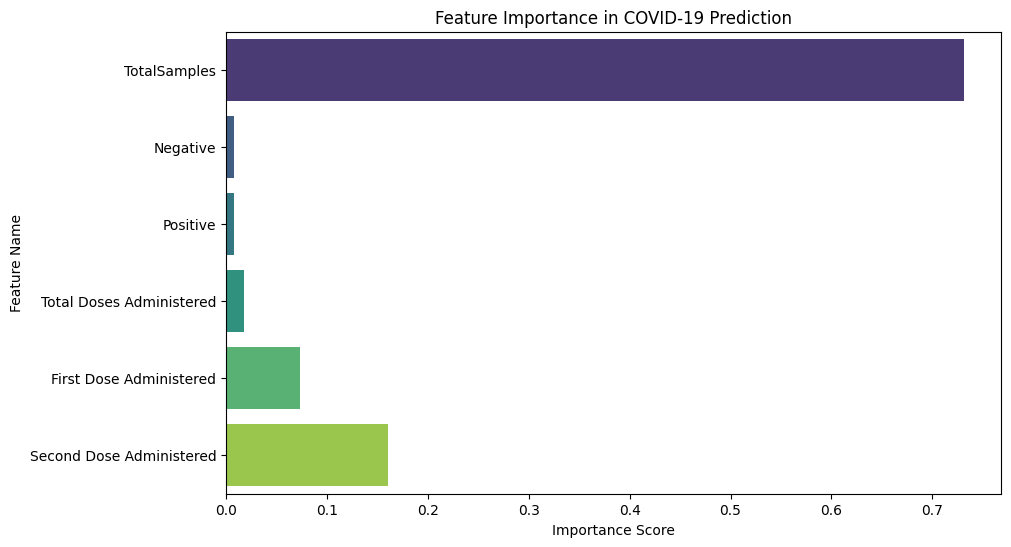

In [51]:
# Feature Importance (Random Forest & Decision Tree Only)

rf_model.fit(X_train, y_train)
# Get feature importance from Random Forest
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.title("Feature Importance in COVID-19 Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


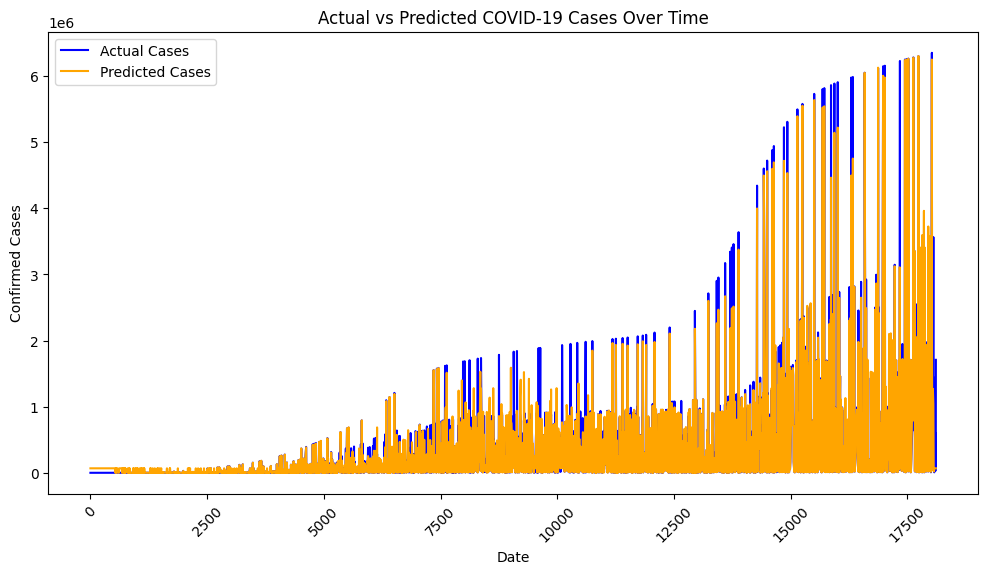

In [52]:
# Time Series of Predicted vs Actual Cases

df_results = pd.DataFrame({'Date': X_test.index, 'Actual': y_test, 'Predicted': y_test_pred})
df_results = df_results.sort_values(by="Date")

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Actual', data=df_results, label='Actual Cases', color='blue')
sns.lineplot(x='Date', y='Predicted', data=df_results, label='Predicted Cases', color='orange')
plt.title("Actual vs Predicted COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.xticks(rotation=45)
plt.show()